# Lecture 25


Recall the Box-Muller transform. This transform generates 2 random variables $Z_0$ and $Z_1$ that are Normal distributed from two uniformly distributed random variables $U_1$ and $U_2$ using the relation:

$$
Z_0 = \sqrt{-2 \log{U_1}}\cos{(2\pi U_2)}\\
Z_1 = \sqrt{-2 \log{U_1}}\sin{(2\pi U_2)}
$$

In [1]:
import math
import random

x=.1
# Useful functions
math.pi
math.sin(x)
math.cos(x)
math.log(x)
math.sqrt(x)
random.random()


0.8484579019433739

In [2]:
def generate_normal(N,m=0,s=1):
    out = list() 
    
    while len(out)<N:
        U1=random.random()
        U2=random.random()
    
        out.append(s*math.sqrt(-2*math.log(U1))*math.cos(2*math.pi*U2)+m)
        out.append(s*math.sqrt(-2*math.log(U1))*math.sin(2*math.pi*U2)+m)

    return out[:N]

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([  2.,  13.,  38., 122., 221., 239., 196., 120.,  41.,   8.]),
 array([-24.98664608, -18.53021445, -12.07378281,  -5.61735118,
          0.83908046,   7.29551209,  13.75194373,  20.20837537,
         26.664807  ,  33.12123864,  39.57767027]),
 <a list of 10 Patch objects>)

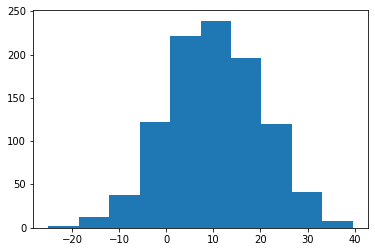

In [4]:
plt.hist(generate_normal(1000,10,10))

## Lab 4

*Exercise 5:* Write a function the applies a booling function (that returns true/false) to every element in data, and return a list of indices of elements where the result was true. Use this function to find the indices of entries greater than 0.5. 

In [14]:
def where(mylist,myfunc):
    out= list()
    for i,v in enumerate(mylist):
        if myfunc(v):
            out.append(i)
    
    return out

In [15]:
# Test your solution here

def greater_than_five(x):
    return x>5

where(list(range(1,10)),greater_than_five)


[5, 6, 7, 8]

In [16]:
where(range(1,10),lambda x: x>5)

[5, 6, 7, 8]

*Exercise 6:* The inrange(mymin,mymax) function below returns a function that tests if it's input is between the specified values. Write corresponding functions that test:
* Even
* Odd
* Greater than
* Less than
* Equal
* Divisible by

In [17]:
# Make a test dataset
import random
data = [ 10*random.random()+5 for _ in range(100) ]
print(min(data),max(data))

5.053226645280587 14.9784604222254


In [19]:
def in_range(mymin,mymax):
    def testrange(x):
        return x<mymax and x>=mymin
    return testrange

# Examples:
F1=in_range(0,10)
F2=in_range(10,20)

# Test of in_range
print (F1(0), F1(1), F1(10), F1(15), F1(20))
print (F2(0), F2(1), F2(10), F2(15), F2(20))

print ("Number of Entries passing F1:", len(where(data,F1)))
print ("Number of Entries passing F2:", len(where(data,F2)))

True True False False False
False False True True False
Number of Entries passing F1: 41
Number of Entries passing F2: 59


In [21]:
### BEGIN SOLUTION

def even(x):
    return x%2==0

def odd(x):
    return x%2==1
    
def greater_than(y):
    def func(x):
        return x>y
    return func
    
def less_than(y):
    def func(x):
        return x<y
    return func

def equal(y):
    def func(x):
        return x==y
    return func

def divisible_by(y):
    def func(x):
        return x%y==0
    return func
    
### END SOLUTION

In [22]:
# Test your solution

d=list(range(50))

print ("Number of Entries passing even:", len(where(d,even)))
print ("Number of Entries passing odd:", len(where(d,odd)))
print ("Number of Entries passing greater than 10:", len(where(d,greater_than(10))))
print ("Number of Entries passing less than 10:", len(where(d,less_than(10))))
print ("Number of Entries passing equal to 10:", len(where(d,equal(10))))
print ("Number of Entries passing divisible by 10:", len(where(d,divisible_by(10))))


Number of Entries passing even: 25
Number of Entries passing odd: 25
Number of Entries passing greater than 10: 39
Number of Entries passing less than 10: 10
Number of Entries passing equal to 10: 1
Number of Entries passing divisible by 10: 5


*Exercise 7:* Repeat the previous exercise using `lambda` and the built-in python functions sum and map instead of your solution above. 

In [25]:
### BEGIN SOLUTION

print ("Number of Entries passing even:", sum(map(lambda x: x%2==0,d)))
print ("Number of Entries passing odd:",  sum(map(lambda x: x%2==1,d)))
print ("Number of Entries passing greater than 10:",  sum(map(lambda x: x>10,d)))
print ("Number of Entries passing less than 10:", sum(map(lambda x: x<10,d)))
print ("Number of Entries passing equal to 10:", sum(map(lambda x: x==10,d)))
print ("Number of Entries passing divisible by 10:", sum(map(lambda x: x%10==0,d)))
    
### END SOLUTION

Number of Entries passing even: 25
Number of Entries passing odd: 25
Number of Entries passing greater than 10: 39
Number of Entries passing less than 10: 10
Number of Entries passing equal to 10: 1
Number of Entries passing divisible by 10: 5


In [29]:
print ("Number of Entries passing even:", len(list(filter(lambda x: x%2==0,d))))

Number of Entries passing even: 25


## Monte Carlo

*Exercise 7:* Write a "generator" function called `generate_function(func,x_min,x_max,N)`, that instead of generating a flat distribution, generates a distribution with functional form coded in `func`. Note that `func` will always be > 0.  

Use the test function below and your histogramming functions above to demonstrate that your generator is working properly.

Hint: A simple, but slow, solution is to a draw random number test_x within the specified range and another number p between the min and max of the function (which you will have to determine). If p<=function(test_x), then place test_x on the output. If not, repeat the process, drawing two new numbers. Repeat until you have the specified number of generated numbers, N. For this problem, it's OK to determine the min and max by numerically sampling the function.  

In [30]:
def linspace(x_min,x_max,steps=10):
    step_size=(x_max-x_min)/steps
    x=x_min
    out = list()
    for i in range(steps):
        out.append(x)
        x+=step_size
    return out

def generate_function(func,x_min,x_max,N=1000):
    out = list()
    
    x_scan = linspace(x_min,x_max,100)
    y_scan = list(map(func,x_scan))
    y_min = min(y_scan)
    y_max = max(y_scan)
    
    while len(out)<N:
        x = x_min + (x_max-x_min)*random.random()
        y = y_min + (y_max-y_min)*random.random()
        
        if y<=func(x):
            out.append(x)

    return out

In [31]:
# A test function
def test_func(x,a=1,b=1):
    return abs(a*x+b)

In [32]:
def histogram(data, n_bins=10,x_min=None, x_max=None):
    if x_min==None:
        x_min=min(data)
    if x_max==None:
        x_max=max(data)
        
    bin_edges = linspace(x_min,x_max,n_bins)
    bin_edges.append(x_max)

    hist=[0]*n_bins
    
    for d in data:
        for i in range(n_bins):
            if d>=bin_edges[i] and d<bin_edges[i+1]:
                hist[i]+=1
                break
                
    return hist,bin_edges

In [33]:
histogram(generate_function(test_func,0,10,100))

([5, 4, 6, 6, 6, 10, 11, 25, 12, 14],
 [1.625677868849802,
  2.4601896464135535,
  3.294701423977305,
  4.129213201541057,
  4.963724979104809,
  5.798236756668561,
  6.632748534232313,
  7.467260311796065,
  8.301772089359817,
  9.136283866923568,
  9.97079564448732])

(array([ 4.,  1.,  3.,  3.,  2.,  3.,  2.,  5.,  5.,  3.,  3.,  6.,  9.,
         8.,  5.,  4.,  6.,  6.,  5., 17.]),
 array([0.96732397, 1.41773003, 1.86813608, 2.31854214, 2.7689482 ,
        3.21935425, 3.66976031, 4.12016637, 4.57057242, 5.02097848,
        5.47138454, 5.92179059, 6.37219665, 6.82260271, 7.27300876,
        7.72341482, 8.17382088, 8.62422693, 9.07463299, 9.52503905,
        9.9754451 ]),
 <a list of 20 Patch objects>)

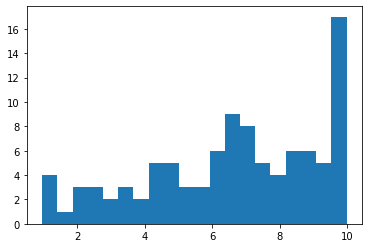

In [35]:
plt.hist(generate_function(test_func,0,10,100),bins=20)

*Exercise 8:* Use your function to generate 1000 numbers that are normal distributed, using the `gaussian` function below. Confirm the mean and variance of the data is close to the mean and variance you specify when building the Gaussian. Histogram the data. 

In [36]:
import math

def gaussian(mean, sigma):
    def f(x):
        return math.exp(-((x-mean)**2)/(2*sigma**2))/math.sqrt(math.pi*sigma)
    return f

# Example Instantiation
g1=gaussian(0,1)
g2=gaussian(10,3)

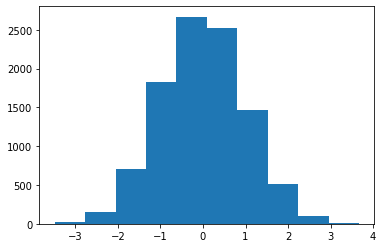

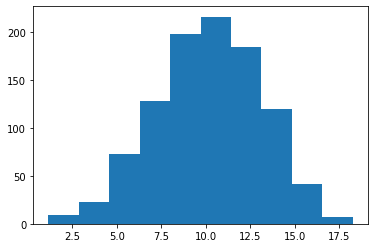

In [37]:
g1_data=generate_function(g1,-5,5,10000)
g2_data=generate_function(g2,0,20,1000)

plt.hist(g1_data)
plt.show()
plt.hist(g2_data)
plt.show()

In [38]:
def mean(x):
    return sum(x)/float(len(x))

def variance(x):
    m=mean(x)
    return (sum(map(lambda y: (y-m)**2,x))/float(len(x)-1))

import math

print(mean(g1_data),math.sqrt(variance(g1_data)))
print(mean(g2_data),math.sqrt(variance(g2_data)))


-0.00439763699193528 0.9950253302945652
10.155388788360836 2.926579183678716


In [39]:
%timeit g1_data=generate_function(g1,-50,50,10000)

548 ms ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%timeit generate_normal(10000,0,1)

9.25 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


*Exercise 9:* Combine your `generate_function`, `where`, and `in_range` functions above to create an integrate function. Use your integrate function to show that approximately 68% of Normal distribution is within one variance.

In [44]:
def integrate(func, x_min, x_max, n_points=1000):

    #out = list()
    
    x_scan = linspace(x_min,x_max,100)
    y_scan = list(map(func,x_scan))
    y_min = min(y_scan)
    y_max = max(y_scan)

    success=0.
    tries=0.
    while tries<n_points:
        tries+=1.
        x = x_min + (x_max-x_min)*random.random()
        y = y_min + (y_max-y_min)*random.random()
        
        if y<=func(x):
            success+=1.

    fraction = success / tries
    area = (x_max-x_min)*(y_max-y_min)
    
    area_prime = (x_max-x_min) * y_min
    
    integral = area * fraction + area_prime

    return integral #,x_scan,y_scan

In [54]:
I_one_sigma=integrate(g1, -1., 1., n_points=10000)

In [55]:
I_five_sigma=integrate(g1, -5, 5, n_points=10000)

In [56]:
I_one_sigma/I_five_sigma

0.6819726453572719

In [60]:
x=list(range(10,50,3))
x

[10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]

In [64]:
start= 0 
end = -1
step = 1
x[start:end:step]

[10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46]

In [65]:
x[:5]

[10, 13, 16, 19, 22]